<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/9_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


# Regressão

A tarefa de regressão, também chamada de **predição ou estimação**, ocorre quando o atributo alvo da base de dados que se deseja aprender **possui valor contínuo, como o preço de uma casa ou o lucro de uma empresa**

Nesse caso, o algoritmo de aprendizado de máquina deve encontrar um **modelo matemático capaz de mapear as entradas numa saída esperada**

In [4]:
from IPython.display import Image

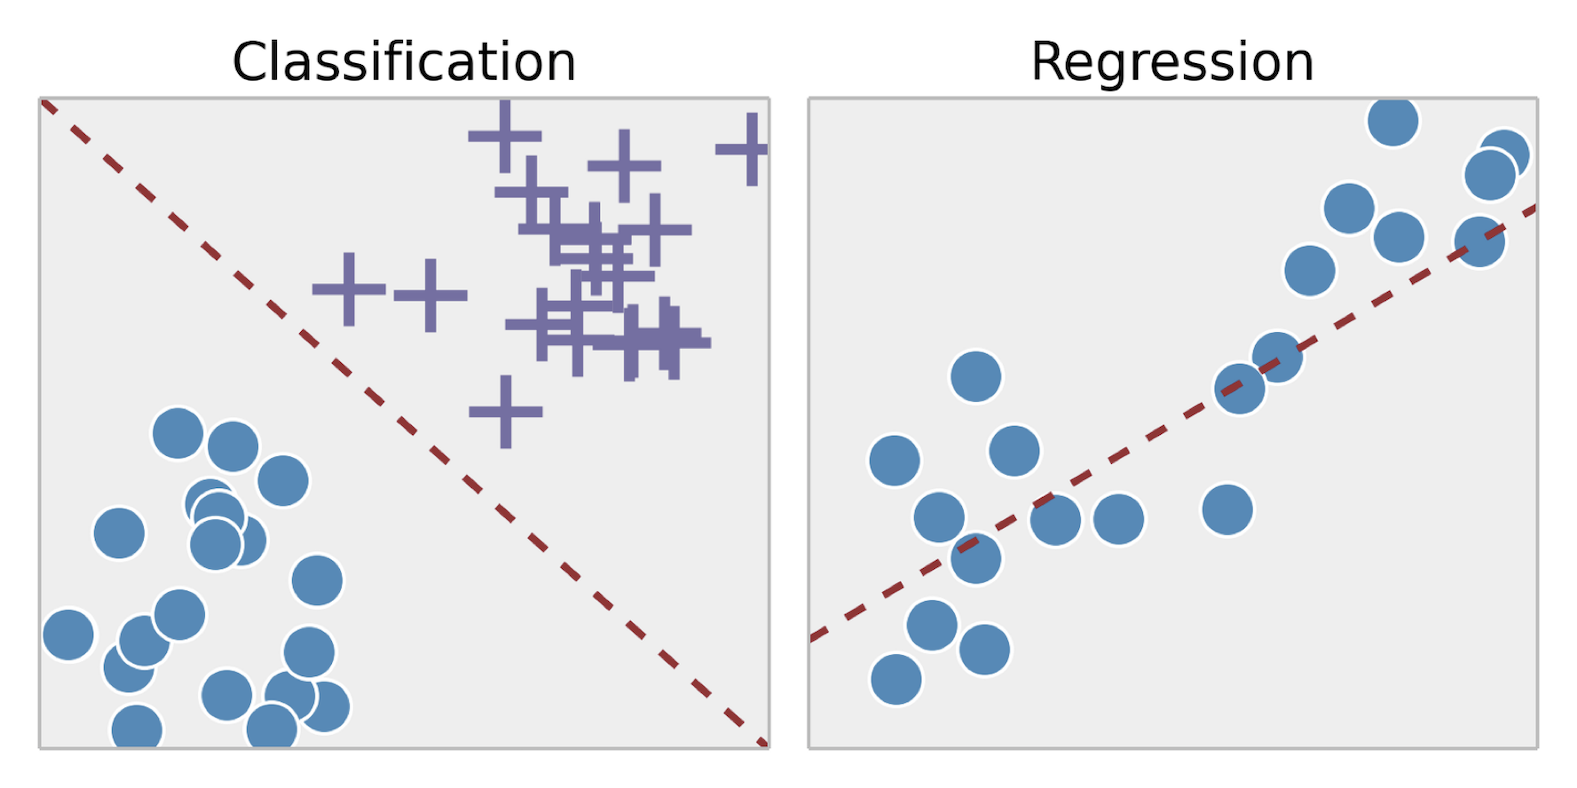

In [23]:
Image('./img/preditivos.png', width = 800, height = 400)

## Regressão linear


A regressão linear permite a criação de modelos que utilizam **relações lineares** entre algumas variáveis, Xi, chamadas de variáveis independentes para predizer o valor de uma variável Y chamada de variável dependente.

**A relação entre elas é representada por um modelo matemático, que associa a variável dependente com as variáveis independentes.**

Exemplos:

* Altura dos pais e altura dos filhos;
* Investimento em publicidade e vendas do produto.

Os exemplos acima mostram uma relação de um para um, nesse caso temos uma Regressão Linear Simples, mas quando temos uma relação de um para muitos, chamamos de Regressão Linear Múltipla 

As técnicas de análise de correlação e regressão estão muito ligadas:
* A correlação mede a força ou o grau da relação entre as variáveis
* A regressão quantifica essa relação, podendo ser usada para prever valores


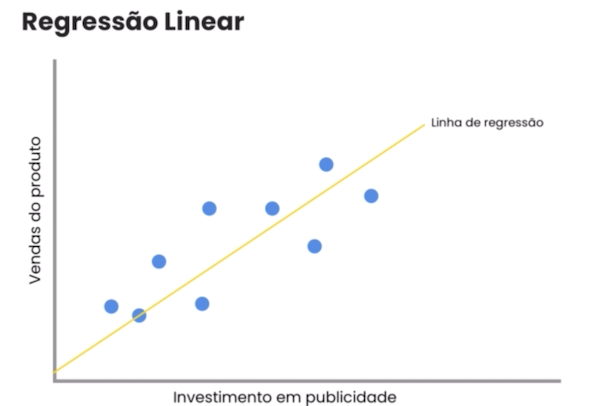

In [5]:
Image('./img/regressaoLinear.png')

A ideia por trás da regressão é encontrar um estimador que maximize o ajuste do modelo aos dados observados, minimizando o erro entre o Y observado e o Y previsto pela equação (tendência a overfitting)

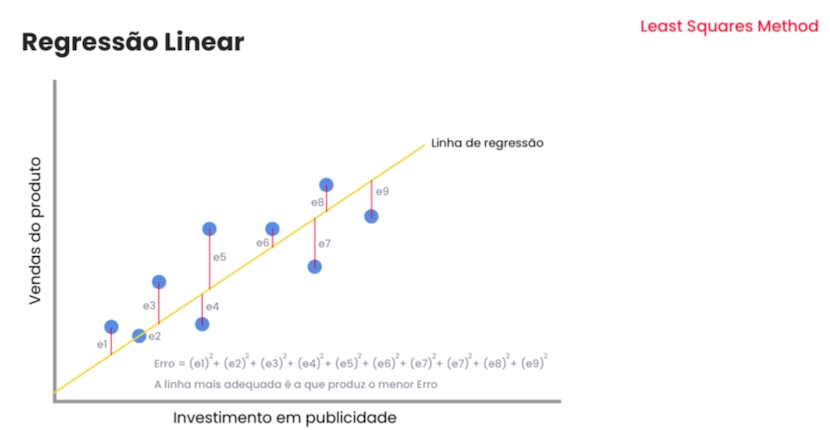

In [6]:
Image('./img/LSM.png')

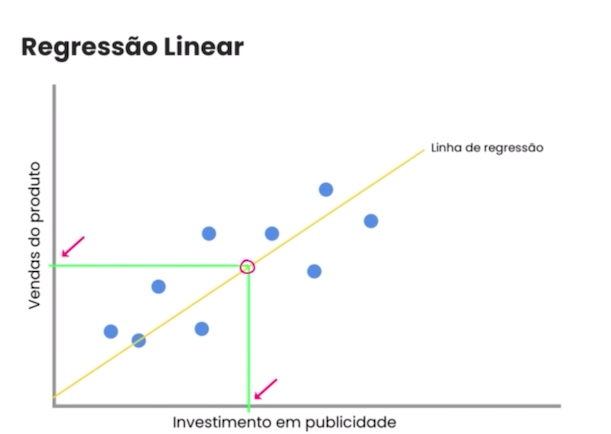

In [7]:
Image('./img/predicao.png')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression

In [6]:
boston = load_boston()

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#Exemplo da aplicação do algoritmo LinearRegression com amostragem usando validação cruzada a partir da função cross_val_predict
#Lembrar que o cross_val_predict retorna os valores preditos pelo modelo para cada instância quando ela esteve no fold de teste
from sklearn.model_selection import cross_val_predict

predictedCV = cross_val_predict(LinearRegression(), boston.data, boston.target, cv=10)

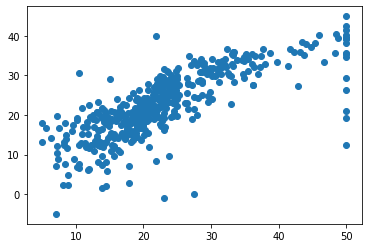

In [75]:
plt.scatter(boston.target, predictedCV)

## Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (erro quadrático médio) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Square Error** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Todas estas são **funções de perda**, porque queremos minimizá-las.

In [9]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(boston.target, predictedCV))
print('MSE:', metrics.mean_squared_error(boston.target, predictedCV))
print('RMSE:', np.sqrt(metrics.mean_squared_error(boston.target, predictedCV)))

MAE: 3.9973058525932483
MSE: 34.53965953999324
RMSE: 5.87704513680074


O MSE coloca mais peso em grandes erros do que em pequenos (resultado do termo de cada quadratura), **enfatizando, assim, dados discrepantes de maneira inconsistente com a mediana de dados de amostra**.


http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862011000400009

In [13]:
#Exemplo para mostrar as métricas em relação aos erros discrepantes

y_ex = [0,0,0,0,0]

pred1_ex = [2,4,5,4,3]
pred2_ex = [2,4,50,4,3] #observe que aqui colocamos um erro discrepante (50)
pred3_ex = [0.1,0.2,0.5, 0.4, 0.3]
pred4_ex = [0.1,0.2,1.5, 0.4, 0.3] #observe que aqui colocamos um erro discrepante (1.5)

print(f'MAE1: {metrics.mean_absolute_error(y_ex, pred1_ex):.2f} MSE1: {metrics.mean_squared_error(y_ex, pred1_ex):.2f} RMSE1: {np.sqrt(metrics.mean_squared_error(y_ex, pred1_ex)):.2f}') 
print(f'MAE2: {metrics.mean_absolute_error(y_ex, pred2_ex):.2f} MSE2: {metrics.mean_squared_error(y_ex, pred2_ex):.2f} RMSE2: {np.sqrt(metrics.mean_squared_error(y_ex, pred2_ex)):.2f}') 
print(f'MAE3: {metrics.mean_absolute_error(y_ex, pred3_ex):.2f} MSE3: {metrics.mean_squared_error(y_ex, pred3_ex):.2f} RMSE3: {np.sqrt(metrics.mean_squared_error(y_ex, pred3_ex)):.2f}') 
print(f'MAE4: {metrics.mean_absolute_error(y_ex, pred4_ex):.2f} MSE4: {metrics.mean_squared_error(y_ex, pred4_ex):.2f} RMSE4: {np.sqrt(metrics.mean_squared_error(y_ex, pred4_ex)):.2f}') 

MAE1: 3.60 MSE1: 14.00 RMSE1: 3.74
MAE2: 12.60 MSE2: 509.00 RMSE2: 22.56
MAE3: 0.30 MSE3: 0.11 RMSE3: 0.33
MAE4: 0.50 MSE4: 0.51 RMSE4: 0.71


**R-quadrado (R2)**:

O R-quadrado é uma medida estatística também conhecida como **coeficiente de determinação**, que serve para avaliar a existência de uma relação útil entre a variável dependente(Y) e as variáveis independentes (Xi) em um modelo de regressão. 

Ele representa a proporção da variância de Y que foi explicada pelas variáveis ​​independentes no modelo. Ele fornece uma indicação da qualidade do ajuste e, portanto, uma medida de quão bem as amostras não vistas podem ser previstas pelo modelo, por meio da proporção da variância explicada.

O R-quadrado está sempre entre 0 e 1:

* 0 indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.

* 1 indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados.

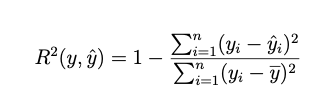

In [14]:
Image('./img/r2.png')

O r2 é o score padrão dos algoritmos de regressão no sklearn

In [21]:
#Exemplo usando a função cross_val_score e KFold para dividir os folds
#Lembrar que cross_val_score retorna os resultados da métrica escolhida (r2 é o padrão) para cada fold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True -> embaralha os dados

linearRegression_result = cross_val_score(LinearRegression(), boston.data, boston.target, cv=kfold) #scoring (métrica) padrão é r2

print(f'LinearRegression R2: {linearRegression_result.mean():.2f} +- {linearRegression_result.std():.2f}')

LinearRegression R2: 0.72 +- 0.08


## Classe runregression

Para executar validação cruzada e obter a média e desvio padrão das métricas (MAE, MSE, RMSE e R2)

In [7]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics

class runregression:
  '''
    Parâmetros de entrada:

    X: atributos de entradas
    y: atributo alvo
    model: algoritmo para construção do estimador
    cv: quantidade de folds da validação cruzada

    Guarda as métricas de cada execução em resultados e 
    Mostra os valores médios com desvio padrão para as métricas (mostraresultadomedio)   
  '''

  def __init__(self, X, y, model, cv = 5):
    
    self.__resultados = {
      'MAE': [],
      'MSE': [],
      'RMSE': [],
      'R2': []
    }

    print(f'validação cruzada com {cv} folds')
    self.__avaliamodelo_cv(X, y, model, cv)

  @property
  def resultados(self):
    return self.__resultados

  def __avaliamodelo_cv(self, X, y, model, cv):
    #gera as amostras para cv folds com embaralhamento (permite fazer várias validações cruzadas)
    kf = KFold(shuffle=True, n_splits=cv)
    #para cada fold: treina, testa e armazena os resultados
    for train_index, test_index in kf.split(X, y):
      model.fit(X[train_index], y[train_index])
      pred = model.predict(X[test_index])
      self.__resultados['MAE'].append(metrics.mean_absolute_error(y[test_index], pred))
      self.__resultados['MSE'].append(metrics.mean_squared_error(y[test_index], pred))
      self.__resultados['RMSE'].append(np.sqrt(metrics.mean_squared_error(y[test_index], pred)))
      self.__resultados['R2'].append(metrics.r2_score(y[test_index], pred))

  def mostraresultadomedio(self):
    print(f"MAE: {np.mean(self.__resultados['MAE']):.2f} +- {np.std(self.__resultados['MAE']):.2f}")
    print(f"MSE: {np.mean(self.__resultados['MSE']):.2f} +- {np.std(self.__resultados['MSE']):.2f}")
    print(f"RMSE: {np.mean(self.__resultados['RMSE']):.2f} +- {np.std(self.__resultados['RMSE']):.2f}")
    print(f"R2: {np.mean(self.__resultados['R2']):.2f} +- {np.std(self.__resultados['R2']):.2f}")

### Linear Regression

####Validação cruzada com a classe runregression

In [24]:
cross_validation_RL = runregression(boston.data, boston.target, LinearRegression(), cv = 10)
cross_validation_RL.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 3.37 +- 0.36
MSE: 23.34 +- 6.60
RMSE: 4.78 +- 0.72
R2: 0.70 +- 0.09


### KNN regressor

Na regressão, o KNN calcula a média dos k vizinhos mais próximos (**média simples ou poderada**) para o novo exemplo
    

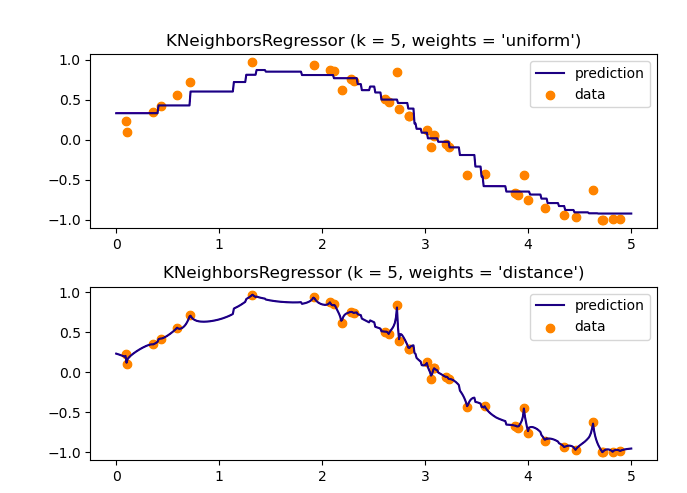

In [48]:
from IPython.display import Image
Image('./img/knnregressor.png')

#### Escolha dos melhores parâmetros com GridSearchCV

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.33)

#define os parâmetros a serem testados com o KNN
param_grid_knn = {'n_neighbors': range(1,40,2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]} 
#cria o objeto do gridsearchcv
gridknn = GridSearchCV(KNeighborsRegressor(), param_grid_knn,  cv = 10, verbose = 1) 
#executa o gridsearchcv para a base separando X e y
gridknn.fit(X_train,y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [37]:
gridknn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

#### Teste com os melhores parâmetros

In [39]:
pred = gridknn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 3.603301496853396
MSE: 23.324645529273514
RMSE: 4.829559558518096
R2: 0.687713243787057


#### Validação cruzada com a classe runregression

In [40]:
knn = gridknn.best_estimator_
cross_validation_knn = runregression(boston.data, boston.target, knn, cv = 10)
cross_validation_knn.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 3.57 +- 0.53
MSE: 29.16 +- 10.87
RMSE: 5.31 +- 0.99
R2: 0.66 +- 0.08


### SVM regressor

Na regressão, o SVM busca pelo hiperplano que se ajuste aos dados, tentando maximizar a margem, **evitando que o modelo fique superajustado aos dados de treino**


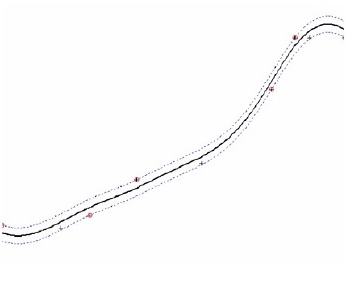

In [56]:
Image('./img/svmregressor.jpg')

#### Escolha dos melhores parâmetros com GridSearchCV

In [60]:
from sklearn.svm import SVR

param_grid_svm = {
    'C': [1, 10, 100], 
    'gamma': ['auto', 'scale'], 
    'kernel': ['rbf', 'sigmoid']
} 
gridsvm = GridSearchCV(SVR(),param_grid_svm, verbose = 3)
gridsvm.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.049, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.016, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.035, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ........ C=1, gamma=auto, kernel=rbf, score=-0.057, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.022, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, gamma=auto, kernel=sigmoid, score=-0.070, total=   0.0s
[CV] C=1, gamma=auto, kernel=sigmoid .................................
[CV] .... C=1, g

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.040, total=   0.0s
[CV] C=1, gamma=scale, kernel=sigmoid ................................
[CV] .... C=1, gamma=scale, kernel=sigmoid, score=0.099, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.056, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.085, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.070, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.006, total=   0.0s
[CV] C=10, gamma=auto, kernel=rbf ....................................
[CV] ........ C=10, gamma=auto, kernel=rbf, score=0.148, total=   0.0s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [61]:
gridsvm.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

####Teste com os melhores parâmetros

In [62]:
pred = gridsvm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 4.079065599663634
MSE: 38.140079435657654
RMSE: 6.1757654939009505
R2: 0.4893537964503214


#### Validação cruzada com a classe runregression

In [63]:
svm = gridsvm.best_estimator_
cross_validation_svm = runregression(boston.data, boston.target, svm, cv = 10)
cross_validation_svm.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 4.14 +- 0.62
MSE: 44.23 +- 16.03
RMSE: 6.54 +- 1.20
R2: 0.48 +- 0.10


### MLP regressor

####Escolha dos melhores parâmetros com GridSearchCV

In [46]:
from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(100, ), (13,)], #default e heurístico
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [5000, 10000]
}

gridmlp = GridSearchCV(MLPRegressor(),param_grid_mlp, verbose = 1)
gridmlp.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', '

In [52]:
gridmlp.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'max_iter': 5000}

####Teste com os melhores parâmetros

In [54]:
pred = gridmlp.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2:', metrics.r2_score(y_test, pred))

MAE: 3.341905937813757
MSE: 19.7923039579496
RMSE: 4.448854229793285
R2: 0.7350067166829443


#### Validação cruzada com a classe runregression

In [55]:
mlp = gridmlp.best_estimator_
cross_validation_mlp = runregression(boston.data, boston.target, mlp, cv = 10)
cross_validation_mlp.mostraresultadomedio()

validação cruzada com 10 folds
MAE: 3.32 +- 0.49
MSE: 23.26 +- 6.70
RMSE: 4.77 +- 0.70
R2: 0.71 +- 0.09
